In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('datos_caso_2.csv')
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sb

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

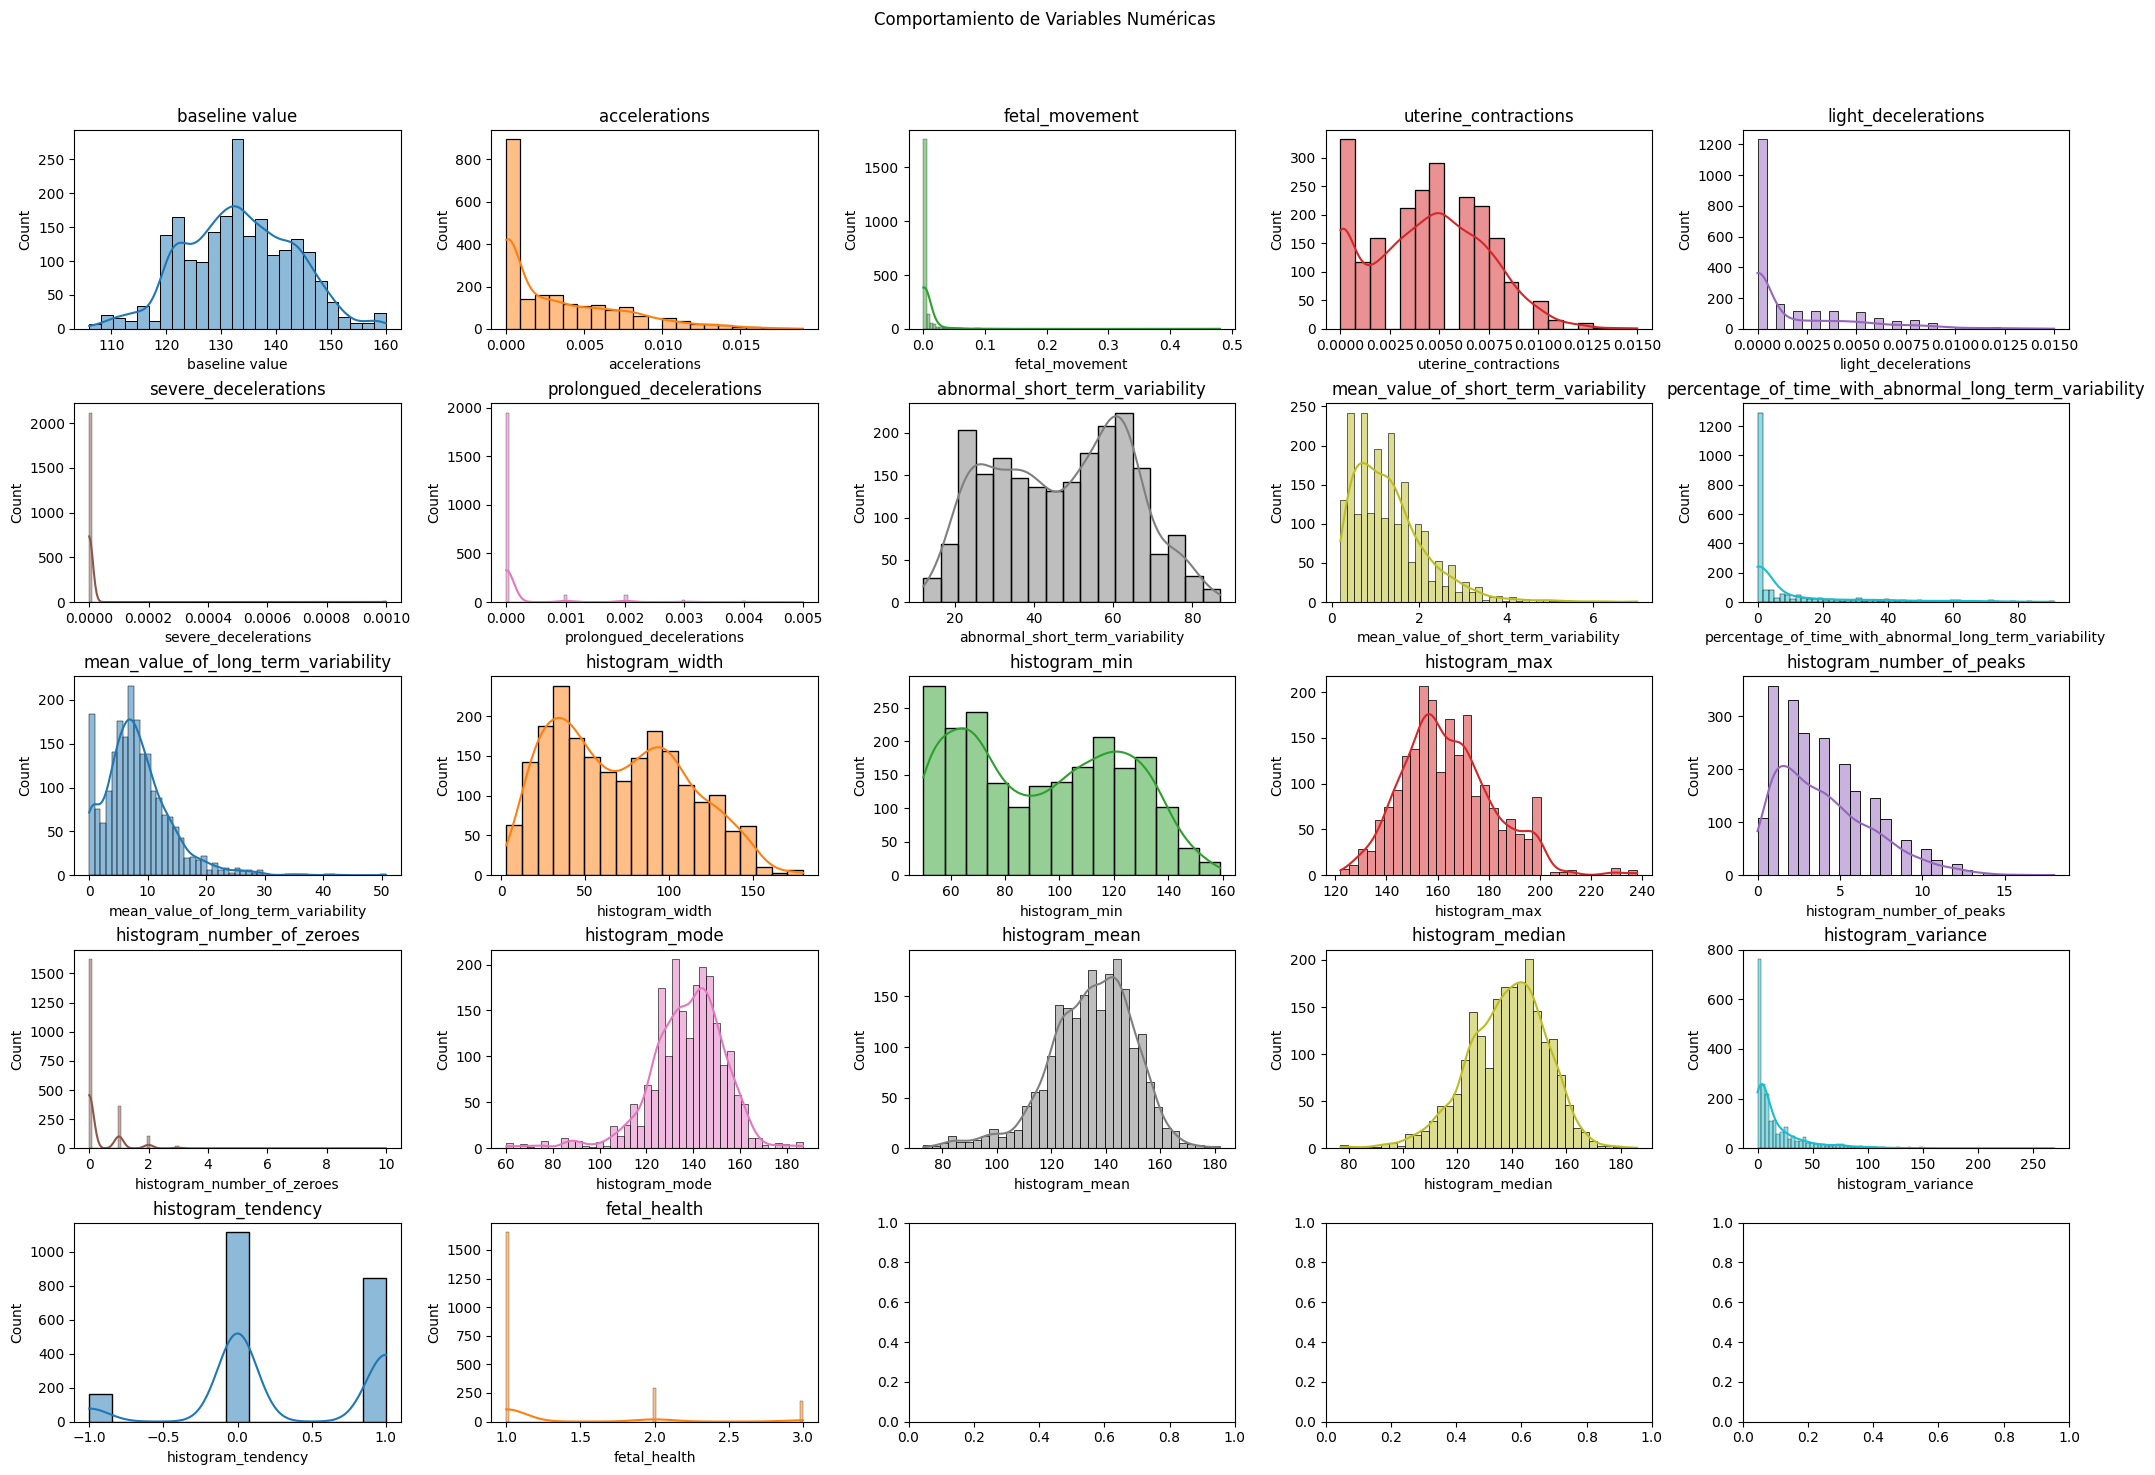

In [4]:
fig, ax = plt.subplots(5, 5, figsize = (21, 15))
ax = ax.flat
num_col = data.select_dtypes(include = ['int64', 'float64']).columns
for i, col in enumerate(num_col):
    sb.histplot(data = data, x = col, 
                kde = True, color = (list(plt.rcParams['axes.prop_cycle']) * 7)[i]['color'], ax = ax[i])
    ax[i].set_title(col)
fig.tight_layout()
fig.subplots_adjust(top = 0.9)
fig.suptitle('Comportamiento de Variables Numéricas')
plt.show()

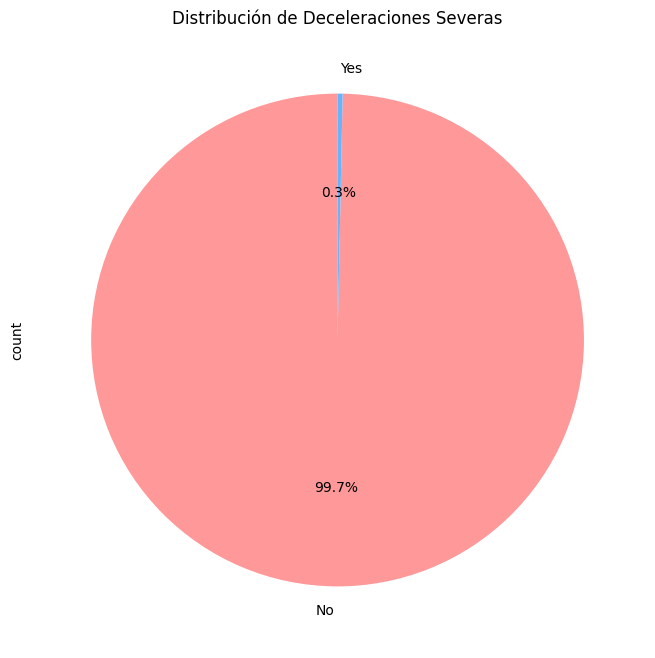

In [5]:
severe_counts = data['severe_decelerations'].value_counts()
severe_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff'],
    labels=['No', 'Yes'],
    title='Distribución de Deceleraciones Severas',
    figsize=(8, 8)
)
plt.show()

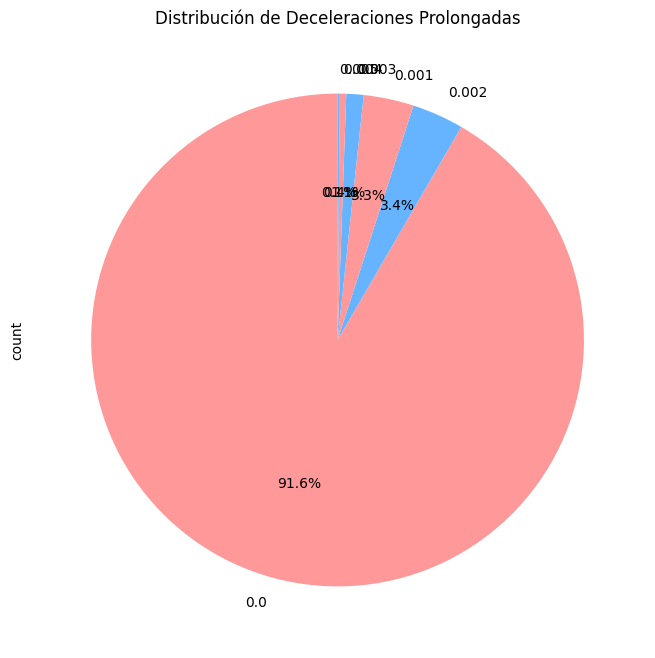

In [6]:
severe_counts = data['prolongued_decelerations'].value_counts()
severe_counts.plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff'],
    # labels=['No', 'Yes'],
    title='Distribución de Deceleraciones Prolongadas',
    figsize=(8, 8)
)
plt.show()

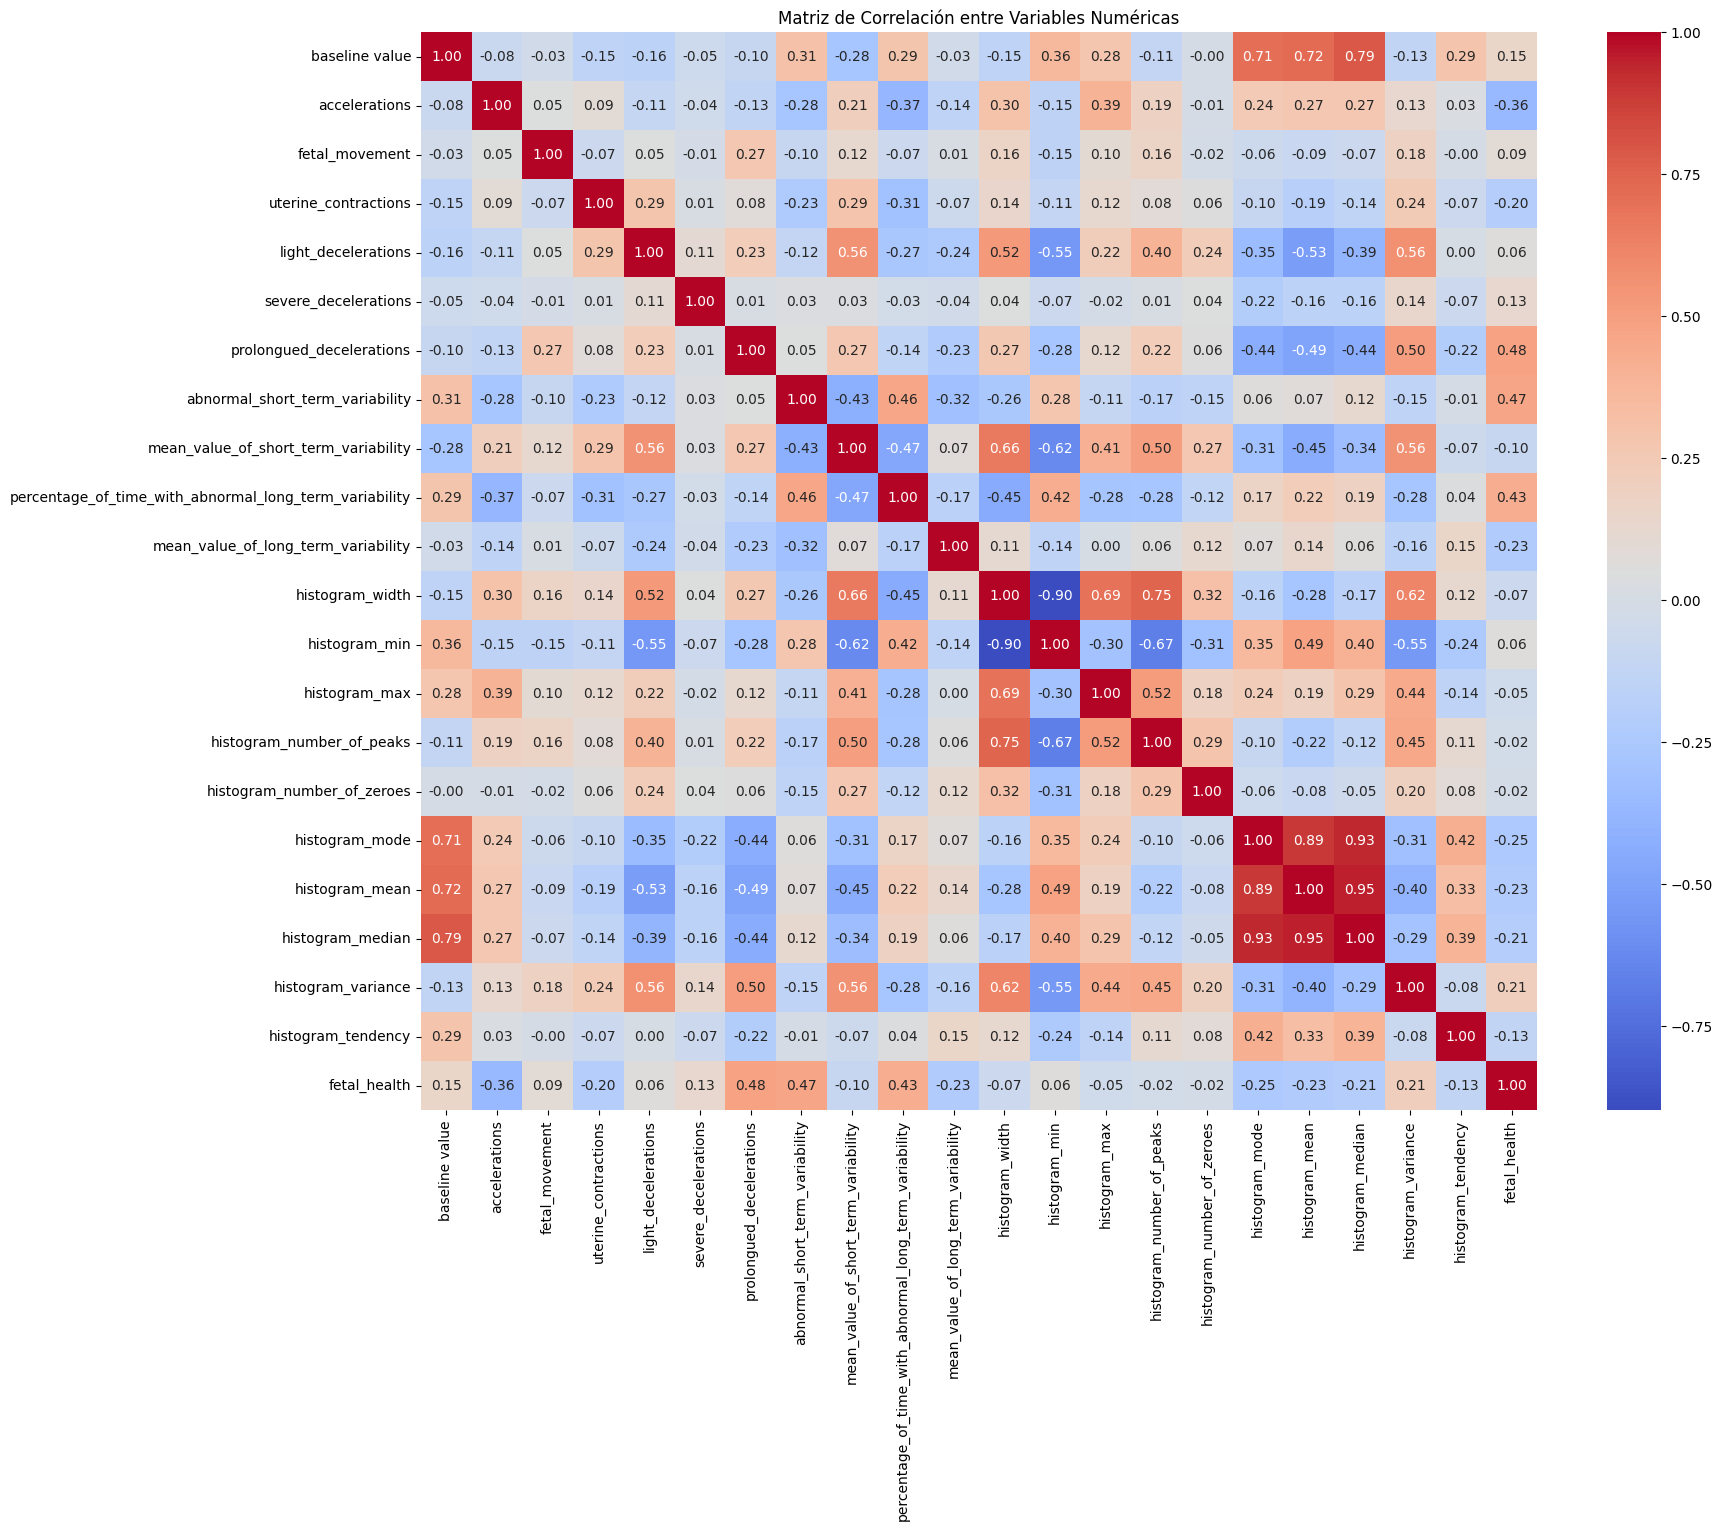

In [7]:
plt.figure(figsize=(18, 14))
correlation_matrix = data.corr(numeric_only=True)
sb.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

In [8]:
data_clean = data.drop(columns=['histogram_median', 'histogram_width', 'histogram_mean', 'prolongued_decelerations', 'severe_decelerations'])
data_clean.head()
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 17 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   abnormal_short_term_variability                         2126 non-null   float64
 6   mean_value_of_short_term_variability                    2126 non-null   float64
 7   percentage_of_time_with_abnormal_long_term_variability  2126 non-null   float64
 8   mean_value_of_long_term_variability   

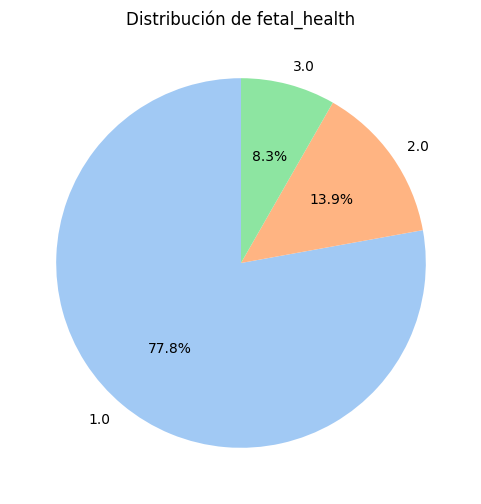

In [9]:
plt.figure(figsize=(6, 6))
data['fetal_health'].astype('object').value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sb.color_palette('pastel'))
plt.title('Distribución de fetal_health')
plt.ylabel('')
plt.show()

# Balanceo del objetivo

In [10]:
data_normal = data_clean[data_clean['fetal_health'] == 1]
data_sospechoso = data_clean[data_clean['fetal_health'] == 2]
data_patologico = data_clean[data_clean['fetal_health'] == 3]

print(f'Normal: {data_normal.shape}')
print(f'Sospechoso: {data_sospechoso.shape}')
print(f'Patológico: {data_patologico.shape}')

Normal: (1655, 17)
Sospechoso: (295, 17)
Patológico: (176, 17)


In [11]:
data_sospechoso_re = data_sospechoso.sample(data_normal.shape[0], replace = True)
data_patologico_re = data_patologico.sample(data_normal.shape[0], replace = True)
data_balanced = pd.concat([data_normal, data_sospechoso_re, data_patologico_re])
data_balanced.reset_index(drop=True, inplace=True)
data_balanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4965 entries, 0 to 4964
Data columns (total 17 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          4965 non-null   float64
 1   accelerations                                           4965 non-null   float64
 2   fetal_movement                                          4965 non-null   float64
 3   uterine_contractions                                    4965 non-null   float64
 4   light_decelerations                                     4965 non-null   float64
 5   abnormal_short_term_variability                         4965 non-null   float64
 6   mean_value_of_short_term_variability                    4965 non-null   float64
 7   percentage_of_time_with_abnormal_long_term_variability  4965 non-null   float64
 8   mean_value_of_long_term_variability   

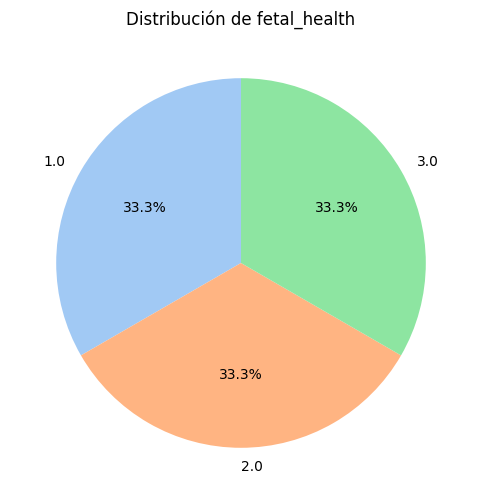

In [12]:
plt.figure(figsize=(6, 6))
data_balanced['fetal_health'].astype('object').value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sb.color_palette('pastel'))
plt.title('Distribución de fetal_health')
plt.ylabel('')
plt.show()

In [13]:
X = data_balanced.drop(columns = ['fetal_health'])
y = data_balanced['fetal_health']
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (4965, 16)
y shape: (4965,)


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline

num_col = X.select_dtypes(include = ['int64', 'float64']).columns.to_list()
num_transformer = Pipeline(steps = [('scaler', MinMaxScaler())])
preprocessor = ColumnTransformer(transformers = [('num', num_transformer, num_col)],
                                                  remainder='passthrough')
preprocessor

,transformers,"[('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,feature_range,"(0, ...)"
,copy,True
,clip,False


In [15]:
X_pre = preprocessor.fit_transform(X)
labels = np.concatenate([num_col])
X_pro = pd.DataFrame(X_pre, columns = labels, index = X.index)
X_pro.head(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_variance,histogram_tendency
0,0.481481,0.315789,0.000000,0.400000,0.200000,0.066667,0.279412,0.0,0.205128,0.165138,0.655172,0.333333,0.1,0.637795,0.044610,0.5
1,0.500000,0.157895,0.000000,0.533333,0.200000,0.053333,0.279412,0.0,0.264300,0.165138,0.655172,0.277778,0.1,0.637795,0.048327,0.5
2,0.518519,0.157895,0.000000,0.533333,0.200000,0.053333,0.323529,0.0,0.453649,0.027523,0.413793,0.611111,0.0,0.606299,0.048327,1.0
3,0.481481,0.368421,0.000000,0.533333,0.000000,0.053333,0.323529,0.0,0.392505,0.027523,0.413793,0.500000,0.0,0.606299,0.040892,1.0
4,0.462963,0.263158,0.149688,0.533333,0.200000,0.213333,0.176471,0.0,0.254438,0.348624,0.275862,0.277778,0.0,0.590551,0.026022,1.0
5,0.462963,0.473684,0.461538,0.400000,0.133333,0.213333,0.191176,0.0,0.106509,0.192661,0.310345,0.111111,0.0,0.637795,0.037175,1.0
6,0.444444,0.315789,0.848233,0.266667,0.333333,0.120000,0.308824,0.0,0.155819,0.155963,0.448276,0.388889,0.0,0.653543,0.282528,0.5
7,0.444444,0.315789,0.790021,0.266667,0.266667,0.093333,0.308824,0.0,0.171598,0.155963,0.448276,0.166667,0.0,0.582677,0.159851,0.5
8,0.444444,0.315789,0.916840,0.333333,0.333333,0.160000,0.279412,0.0,0.214990,0.027523,0.482759,0.277778,0.0,0.653543,0.260223,1.0
9,0.444444,0.157895,0.937630,0.400000,0.266667,0.146667,0.250000,0.0,0.173570,0.082569,0.310345,0.333333,0.0,0.574803,0.133829,1.0


In [16]:
from sklearn.model_selection import train_test_split
# Plantar semilla: np.random.seed(25), regresión lineal no usa aleatorios podemos obtener los coeficientes
X_train, X_test, y_train, y_test = train_test_split(X_pro, y, train_size=0.7, random_state=123)
print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (3475, 16), y_train shape: (3475,)
X_test shape: (1490, 16), y_test shape: (1490,)


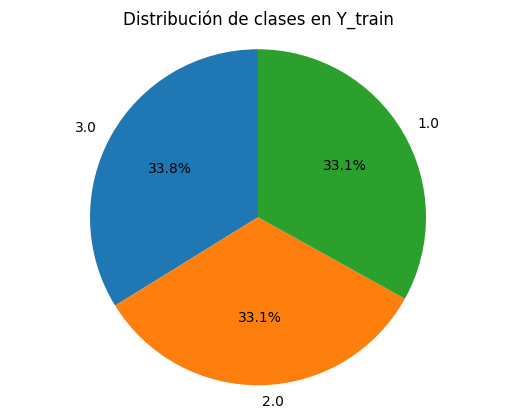

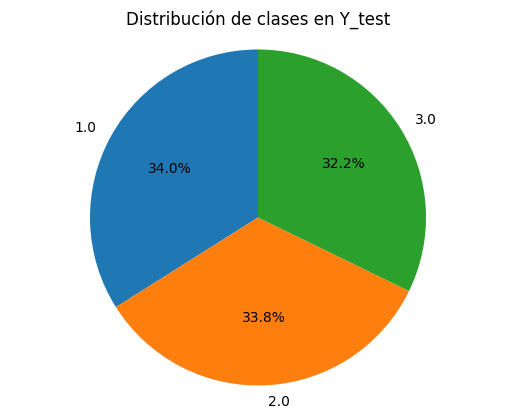

In [17]:
plt.pie(x = y_train.value_counts(),
        labels = y_train.value_counts().index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribución de clases en Y_train')
plt.axis('equal')
plt.show()

plt.pie(x = y_test.value_counts(),
        labels = y_test.value_counts().index,
        autopct='%1.1f%%',
        startangle=90)
plt.title('Distribución de clases en Y_test')
plt.axis('equal')
plt.show()

# **Modelado de los Datos**

## Regresión Logística

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

modelo_1 = LogisticRegression(solver='saga',random_state=123)
param_grid = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]} # Si el resultado es muy alto hay que ampliar el rango de busqueda
clf_1 = GridSearchCV(estimator=modelo_1, param_grid=param_grid, cv=5, scoring='accuracy')
clf_1.fit(X_train, y_train)

,estimator,LogisticRegre...solver='saga')
,param_grid,"{'C': [0.0001, 0.001, ...], 'penalty': ['l1', 'l2', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [19]:
validation = pd.concat([pd.DataFrame(clf_1.cv_results_['params']),
                        pd.DataFrame(clf_1.cv_results_['mean_test_score'], columns=['accuracy'])], axis=1)
validation.sort_values('accuracy', ascending=False)

,C,penalty,accuracy
16,10.0000,l2,0.866763
12,1.0000,l1,0.866763
19,100.0000,l2,0.865324
15,10.0000,l1,0.865324
21,1000.0000,l1,0.865036
22,1000.0000,l2,0.865036
18,100.0000,l1,0.864748
13,1.0000,l2,0.842590
9,0.1000,l1,0.837698
10,0.1000,l2,0.817554


In [20]:
modelo_1_final = clf_1.best_estimator_
modelo_1_final

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,123
,solver,'saga'
,max_iter,100
,multi_class,'deprecated'


Metricas de desempeño
              precision    recall  f1-score   support

         1.0       0.94      0.85      0.89      1149
         2.0       0.81      0.87      0.84      1151
         3.0       0.88      0.89      0.89      1175

    accuracy                           0.87      3475
   macro avg       0.88      0.87      0.87      3475
weighted avg       0.88      0.87      0.87      3475



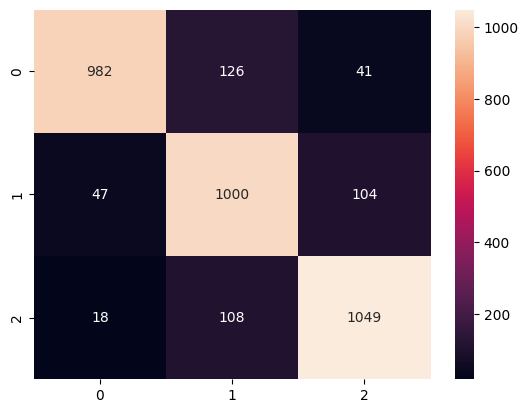

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred_1_train = modelo_1_final.predict(X_train)
print('Metricas de desempeño')
print(classification_report(y_train, y_pred_1_train))
sb.heatmap(confusion_matrix(y_train, y_pred_1_train), annot=True, fmt='d')
plt.show()

Metricas de desempeño en validacion
              precision    recall  f1-score   support

         1.0       0.95      0.85      0.90       506
         2.0       0.84      0.88      0.86       504
         3.0       0.88      0.93      0.90       480

    accuracy                           0.89      1490
   macro avg       0.89      0.89      0.89      1490
weighted avg       0.89      0.89      0.89      1490



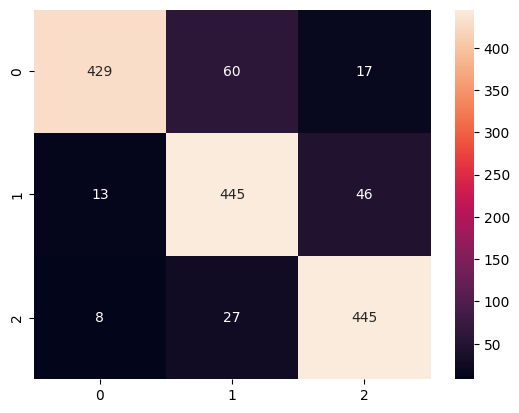

In [22]:
y_pred_test_1 = modelo_1_final.predict(X_test)
print('Metricas de desempeño en validacion')
print(classification_report(y_test, y_pred_test_1))
sb.heatmap(confusion_matrix(y_test, y_pred_test_1), annot=True, fmt='d')
plt.show()

## K-Neighbors

In [23]:
from sklearn.neighbors import KNeighborsClassifier
modelo_2 = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5 ,7, 19, 21, 53], 'p':[1, 2]}
clf_2 = GridSearchCV(estimator=modelo_2, param_grid=param_grid, cv=5, scoring='f1_weighted')
clf_2.fit(X_train, y_train)

,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'p': [1, 2]}"
,scoring,'f1_weighted'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [24]:
validation = pd.concat([pd.DataFrame(clf_2.cv_results_['params']),
                        pd.DataFrame(clf_2.cv_results_['mean_test_score'], columns=['f1'])], axis=1)
validation.sort_values('f1', ascending=False)

,n_neighbors,p,f1
0,3,1,0.960629
1,3,2,0.956887
2,5,1,0.939669
3,5,2,0.934583
4,7,1,0.918691
5,7,2,0.916915
6,19,1,0.886364
8,21,1,0.882561
7,19,2,0.877100
9,21,2,0.871086


In [25]:
modelo_2_final = clf_2.best_estimator_
modelo_2_final

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,1
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Métricas de desempeño en entrenamiento
              precision    recall  f1-score   support

         1.0       1.00      0.94      0.97      1149
         2.0       0.95      1.00      0.97      1151
         3.0       0.99      1.00      1.00      1175

    accuracy                           0.98      3475
   macro avg       0.98      0.98      0.98      3475
weighted avg       0.98      0.98      0.98      3475



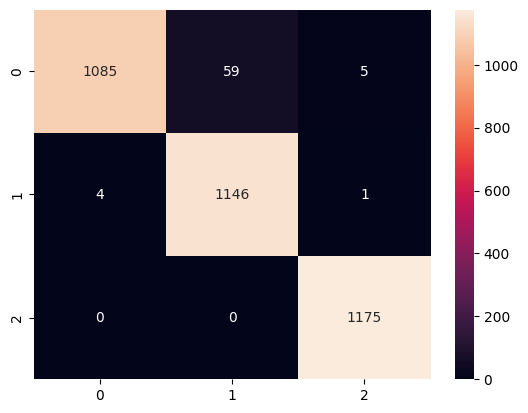

In [26]:
y_pred_2_train = modelo_2_final.predict(X_train)
print('Métricas de desempeño en entrenamiento')
print(classification_report(y_train, y_pred_2_train))
sb.heatmap(confusion_matrix(y_train, y_pred_2_train), annot=True, fmt='d')
plt.show()

Métricas de desempeño en entrenamiento
              precision    recall  f1-score   support

         1.0       0.99      0.92      0.95       506
         2.0       0.94      0.98      0.96       504
         3.0       0.97      1.00      0.99       480

    accuracy                           0.97      1490
   macro avg       0.97      0.97      0.97      1490
weighted avg       0.97      0.97      0.97      1490



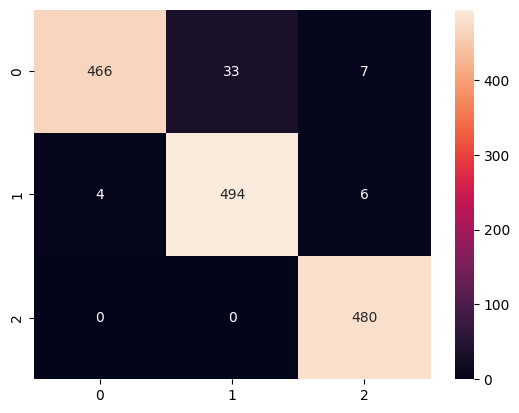

In [27]:
y_pred_2_test = modelo_2_final.predict(X_test)
print('Métricas de desempeño en entrenamiento')
print(classification_report(y_test, y_pred_2_test))
sb.heatmap(confusion_matrix(y_test, y_pred_2_test), annot=True, fmt='d')
plt.show()

## Máquina de Soporte Vectorial

In [28]:
from sklearn.svm import SVC
modelo_3 = SVC(random_state=123)
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree': [2, 3, 4]}
clf_3 = GridSearchCV(estimator=modelo_3, param_grid=param_grid, cv=5, scoring='f1_weighted')
clf_3.fit(X_train, y_train)

,estimator,SVC(random_state=123)
,param_grid,"{'C': [0.0001, 0.001, ...], 'degree': [2, 3, ...], 'kernel': ['linear', 'poly', ...]}"
,scoring,'f1_weighted'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1000


In [29]:
validation = pd.concat([pd.DataFrame(clf_3.cv_results_['params']),
                       pd.DataFrame(clf_3.cv_results_['mean_test_score'], columns=['f1'])], axis=1)
validation.sort_values('f1', ascending=False)

,C,degree,kernel,f1
93,1000.0000,4,poly,0.969680
86,1000.0000,2,rbf,0.969462
90,1000.0000,3,rbf,0.969462
94,1000.0000,4,rbf,0.969462
89,1000.0000,3,poly,0.964871
...,...,...,...,...
8,0.0001,4,linear,0.170883
11,0.0001,4,sigmoid,0.170883
10,0.0001,4,rbf,0.170883
14,0.0010,2,rbf,0.170883


In [30]:
modelo_3_final = clf_3.best_estimator_
modelo_3_final

,C,1000
,kernel,'poly'
,degree,4
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Metricas de desempeño en entrenamiento:
              precision    recall  f1-score   support

         1.0       1.00      0.99      1.00      1149
         2.0       0.99      1.00      1.00      1151
         3.0       1.00      1.00      1.00      1175

    accuracy                           1.00      3475
   macro avg       1.00      1.00      1.00      3475
weighted avg       1.00      1.00      1.00      3475



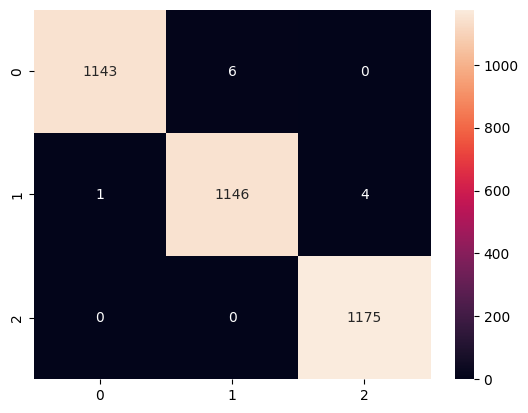

In [31]:
y_pred_3_train = modelo_3_final.predict(X_train)
print('Metricas de desempeño en entrenamiento:')
print(classification_report(y_train, y_pred_3_train))
sb.heatmap(confusion_matrix(y_train, y_pred_3_train), annot=True, fmt='d')
plt.show()

Metricas de desempeño en entrenamiento:
              precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       506
         2.0       0.95      0.98      0.97       504
         3.0       0.98      1.00      0.99       480

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490



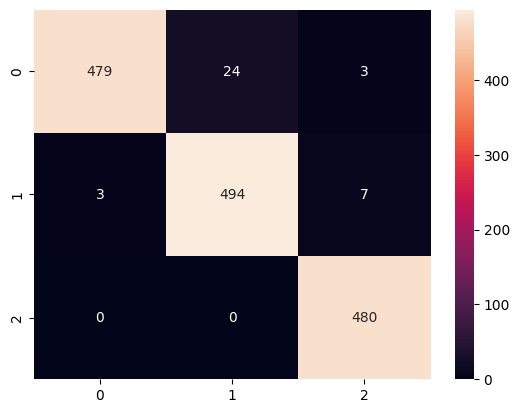

In [32]:
y_pred_3_test = modelo_3_final.predict(X_test)
print('Metricas de desempeño en entrenamiento:')
print(classification_report(y_test, y_pred_3_test))
sb.heatmap(confusion_matrix(y_test, y_pred_3_test), annot=True, fmt='d')
plt.show()

## Árbol de Decisiones

In [33]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
modelo_4 = DecisionTreeClassifier(random_state=123)
param_grid={'criterion':['log_loss', 'gini', 'entropy'], 'max_depth':[None, 5, 10, 15, 20], 'max_leaf_nodes':[None, 10, 20, 50], 'min_samples_split': [2, 3, 4]}

In [34]:
clf_4 = GridSearchCV(estimator=modelo_4, param_grid=param_grid, cv=3, scoring='f1_weighted')
clf_4.fit(X_train, y_train)

,estimator,DecisionTreeC...dom_state=123)
,param_grid,"{'criterion': ['log_loss', 'gini', ...], 'max_depth': [None, 5, ...], 'max_leaf_nodes': [None, 10, ...], 'min_samples_split': [2, 3, ...]}"
,scoring,'f1_weighted'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'log_loss'


In [35]:
validation = pd.concat([pd.DataFrame(clf_4.cv_results_['params']),
                       pd.DataFrame(clf_4.cv_results_['mean_test_score'], columns=['f1'])], axis=1)
validation.sort_values('f1', ascending=False)

,criterion,max_depth,max_leaf_nodes,min_samples_split,f1
36,log_loss,15.0,NaN,2,0.973441
156,entropy,15.0,NaN,2,0.973441
48,log_loss,20.0,NaN,2,0.972291
0,log_loss,NaN,NaN,2,0.972291
120,entropy,NaN,NaN,2,0.972291
...,...,...,...,...,...
65,gini,NaN,10.0,4,0.845901
64,gini,NaN,10.0,3,0.845901
77,gini,5.0,10.0,4,0.845901
76,gini,5.0,10.0,3,0.845901


Profundidad del arbol: 15
Numero de hojas: 123


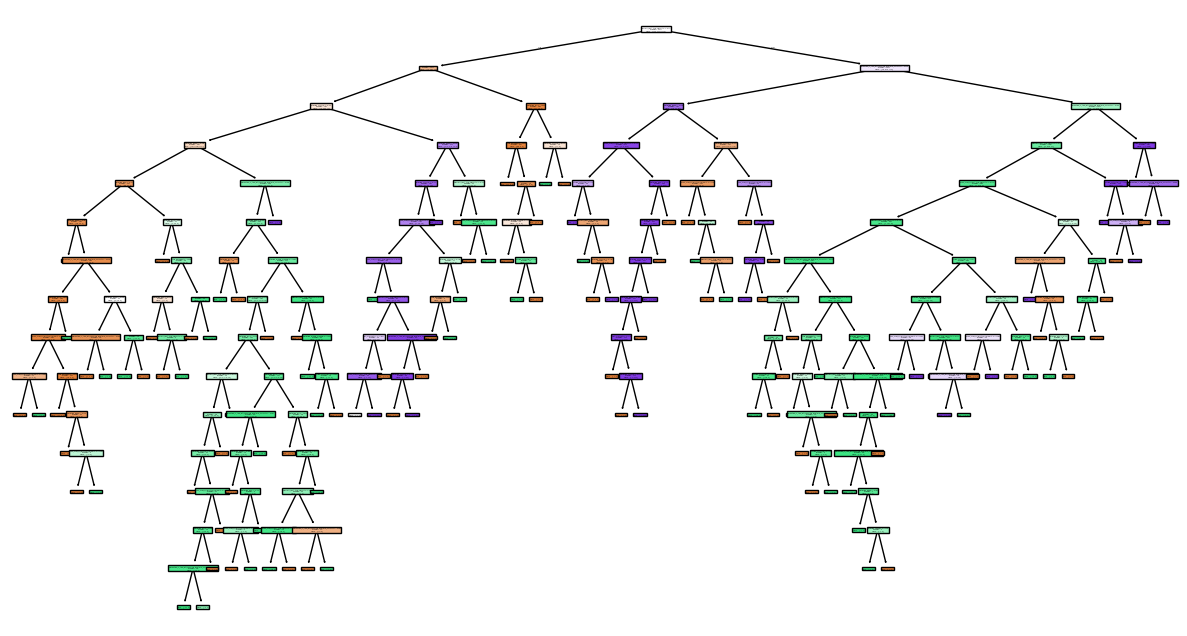

In [36]:
modelo_4_final = clf_4.best_estimator_
fig, ax = plt.subplots(figsize=(15, 8))
print(f'Profundidad del arbol: {modelo_4_final.get_depth()}\nNumero de hojas: {modelo_4_final.get_n_leaves()}')
plot = plot_tree(decision_tree=modelo_4_final, feature_names=labels, filled=True, impurity=False, ax=ax)

Metricas de desempeño en entrenamiento:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      1149
         2.0       1.00      1.00      1.00      1151
         3.0       1.00      1.00      1.00      1175

    accuracy                           1.00      3475
   macro avg       1.00      1.00      1.00      3475
weighted avg       1.00      1.00      1.00      3475



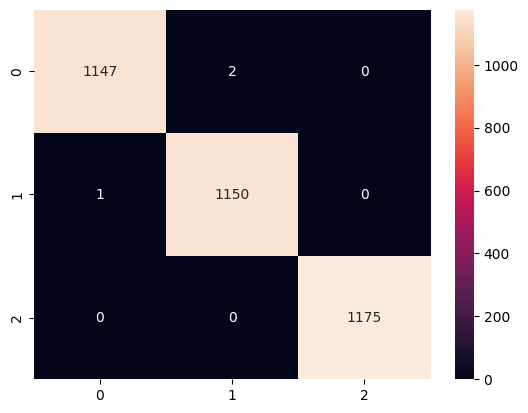

In [37]:
y_pred_4_train = modelo_4_final.predict(X_train)
print('Metricas de desempeño en entrenamiento:')
print(classification_report(y_train, y_pred_4_train))
sb.heatmap(confusion_matrix(y_train, y_pred_4_train), annot=True, fmt='d')
plt.show()

Metricas de desempeño en entrenamiento:
              precision    recall  f1-score   support

         1.0       1.00      0.95      0.97       506
         2.0       0.96      1.00      0.98       504
         3.0       0.99      1.00      1.00       480

    accuracy                           0.98      1490
   macro avg       0.98      0.98      0.98      1490
weighted avg       0.98      0.98      0.98      1490



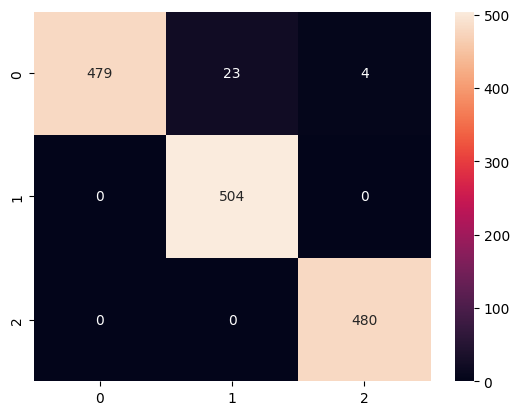

In [38]:
y_pred_4_test = modelo_4_final.predict(X_test)
print('Metricas de desempeño en entrenamiento:')
print(classification_report(y_test, y_pred_4_test))
sb.heatmap(confusion_matrix(y_test, y_pred_4_test), annot=True, fmt='d')
plt.show()